In [1]:
"""
    Isometric Ballistic trajectory calculation (with rotation)
    
    Similiar to Desperados PC-game dynamite throwing.

"""

In [2]:
import math
import numpy as np

from ipywidgets import interact
import matplotlib.pyplot as plt
plt.ioff()

x = np.linspace(0, 10, 1000)

In [3]:
def create_grid_lines(grids_count=5):
    
    grids_count = int(grids_count)
    grids_X = [  ([0, grids_count], [i, i]) for i in range(grids_count+1)  ]
    grids_Y = [  ([i, i], [0, grids_count]) for i in range(grids_count+1)  ]

    return grids_X + grids_Y

def create_grid_lines(use_z_axis=False, grids_count=5):
    
    grids_count = int(grids_count)
    grids_X = [  ([0, grids_count], [i, i]) for i in range(grids_count+1)  ]
    grids_Y = [  ([i, i], [0, grids_count]) for i in range(grids_count+1)  ]

    return grids_X + grids_Y

In [4]:
def plots(list_of_plots):
    """ plotting list of plots """
    
    plt.figure(figsize=(15,15))
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.xticks([])
    plt.yticks([])
    
    for plot in list_of_plots:
        x_list = plot[0]
        y_list = plot[1]
            
        plt.plot(x_list, y_list, color='black', linewidth=0.5)

In [5]:
def trajectory(start_angle=70,
               start_velocity=5,
               start_x=1,
               start_y=1,
               step=0.1,
               max_dots=100,
               add_bounce_to_return=False,
               bounce_coeff=0.7):
    g = 9.81
    start_angle = math.radians(start_angle)
    
    steps  = [round(step*i, 2) for i in range(int(max_dots))]
    x_list = []
    y_list = []
    
    # calculate trajectory
    for step in steps:
        x = step + start_x
        y = round(
                step * (  math.tan(start_angle) - ( (step * g) / (2 * (start_velocity**2) * (math.cos(start_angle)**2)) )  ),
                2) + start_y
        
        if y < 0:
            break
        else:
            x_list.append(x)
            y_list.append(y)
        
    # calculate coordiante of fall
    time_of_rise = start_velocity*math.sin(start_angle) / g
    maximum_hegiht = start_y + (start_velocity*math.sin(start_angle))*time_of_rise - 0.5*g*(time_of_rise**2)
    time_of_fall = math.sqrt(2*maximum_hegiht/g)
    time_of_flight = time_of_rise + time_of_fall
    distance = round(start_velocity*math.cos(start_angle) * time_of_flight, 2)
    coordiante_of_fall = (distance + start_x, 0)
    x_list.append(coordiante_of_fall[0])
    y_list.append(coordiante_of_fall[1])
    
    if not add_bounce_to_return:
        return (x_list, y_list)
    
    else:
        # calculating next start angle
        dy_dx_at_fall = math.tan(start_angle) - ( (distance * g) / ((start_velocity**2) * (math.cos(start_angle)**2)) )
        next_start_angle = math.atan(dy_dx_at_fall)
        if next_start_angle < 0:
            next_start_angle = math.pi + next_start_angle
        next_start_angle = 180 - round(math.degrees(next_start_angle), 2)
        
        # calculating next start velocity
        velocity_x_at_fall = start_velocity * math.cos(start_angle)
        velocity_y_at_fall = g * time_of_fall
        fall_velocity = math.sqrt(math.pow(velocity_x_at_fall, 2) + math.pow(velocity_y_at_fall, 2))
        next_start_velocity = round(fall_velocity * bounce_coeff, 2)
        return (x_list, y_list, next_start_angle, next_start_velocity, coordiante_of_fall[0], coordiante_of_fall[1])

In [6]:
def create_trajectory(n_bounce=2,
                      start_angle=70,
                      start_velocity=5,
                      start_x=1,
                      start_y=1,
                      step=0.1,
                      max_dots=100,
                      bounce_coeff=0.7):
    trajectories_list = []
    n_bounce = int(n_bounce)

    list_of_x, list_of_y, next_start_angle, next_start_velocity, next_start_x, next_start_y = \
        trajectory(start_angle=start_angle,
                   start_velocity=start_velocity,
                   start_x=start_x,
                   start_y=start_y,
                   step=step,
                   max_dots=max_dots,
                   add_bounce_to_return=True,
                   bounce_coeff=bounce_coeff)
    trajectories_list.append((list_of_x, list_of_y))

    if n_bounce > 0:
        for each_bounce in range(n_bounce):
            step /= 2
            max_dots *= 10
            bounce_coeff *= 0.85
            list_of_x, list_of_y, next_start_angle, next_start_velocity, next_start_x, next_start_y = \
                trajectory(start_angle=next_start_angle,
                           start_velocity=next_start_velocity,
                           start_x=next_start_x,
                           start_y=next_start_y,
                           step=step,
                           max_dots=max_dots,
                           add_bounce_to_return=True,
                           bounce_coeff=bounce_coeff)
            trajectories_list.append((list_of_x, list_of_y)) 
    
    return trajectories_list

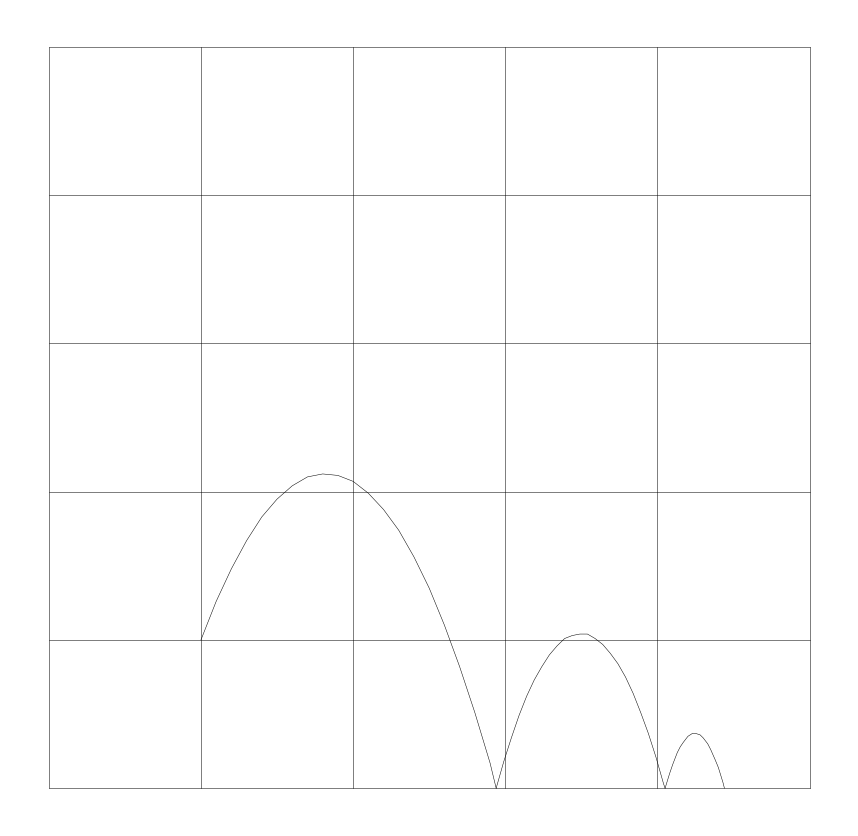

In [7]:
#list_of_plots = create_grid_lines() + [trajectory()]
list_of_plots = create_grid_lines() + create_trajectory()
plots(list_of_plots)

In [8]:
def isometric(list_of_plots, angle=30):
    new_list_of_plots = []
    
    for plot in list_of_plots:
        
        x_list = plot[0]
        y_list = plot[1]
        
        if plot[2:3]:
            z_list = plot[2]
        else:
            z_list = [0 for each in x_list]
            
        new_list_of_plots.append(isometric_transform(x_list, y_list, z_list, angle=angle))
        
    return new_list_of_plots

In [9]:
def isometric_transform(list_of_x, list_of_y, list_of_z, angle=30):

    iso_coeff = 0.82
    min_x = 0.01
    angle = math.radians(angle)
    cos_angle = math.cos(angle)
    sin_angle = math.sin(angle)
    tan_angle = math.tan(angle)

    list_of_x_transformed = []
    list_of_y_transformed = []

    for x, y, z in zip(list_of_x, list_of_y, list_of_z):
        x *= iso_coeff
        y *= iso_coeff
        z *= iso_coeff

        if math.fabs(x) <= min_x:
            alpha = math.pi / 2
        else:
            alpha = math.atan(y / x)
        new_alpha = alpha * (1 - (2*angle/math.pi)) + angle

        new_x = round(x, 2)
        new_y = round(y + x*tan_angle, 2)

        if z:
            new_x -= z * cos_angle
            new_y += z * sin_angle

        list_of_x_transformed.append(new_x)
        list_of_y_transformed.append(new_y)

    return list_of_x_transformed, list_of_y_transformed

In [10]:
def rotate(list_of_plots, angle=30):
    
    list_of_rotated_plots = []
    
    for plot in list_of_plots:
        
        x_list = plot[0]
        y_list = plot[1]
        
        if plot[2:3]:
            z_list = plot[2]
        else:
            z_list = [0 for each in x_list]
            
        list_of_rotated_plots.append(rotation_transform(x_list, y_list, z_list, angle=angle))
        
    return list_of_rotated_plots

In [11]:
def rotation_transform(list_of_x, list_of_y, list_of_z, angle=30):
    
    min_x = 0.01
    angle = math.radians(angle)
    
    list_of_x_transformed = []
    list_of_z_transformed = []
    
    for x, y, z in zip(list_of_x, list_of_y, list_of_z):
        if math.fabs(x) <= min_x:
            alpha = math.pi / 2
        else:
            alpha = math.atan(z / x)
        new_alpha = alpha + angle
        
        xz_length = math.sqrt( math.pow(x, 2) + math.pow(z, 2) )
        
        new_x = round(xz_length*math.cos(new_alpha), 2)
        new_z = round(xz_length*math.sin(new_alpha), 2)
        
        list_of_x_transformed.append(new_x)
        list_of_z_transformed.append(new_z)

    return list_of_x_transformed, list_of_y, list_of_z_transformed

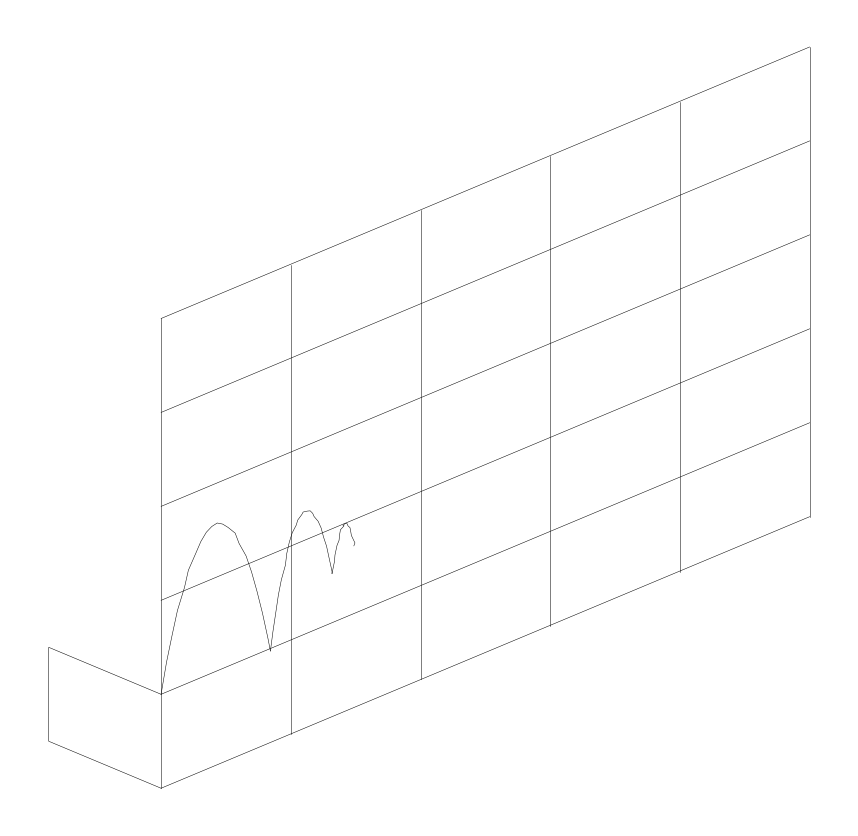

In [12]:
list_of_plots = create_grid_lines() + rotate(create_trajectory(start_x=0), angle=30) + [[[0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0]], ]
plots(isometric(list_of_plots))

In [13]:
plt.ion()

In [14]:
def f(x):
    list_of_plots = create_grid_lines() + rotate(create_trajectory(start_x=0), angle=x) + [[[0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0]], ] + rotate([[[0, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 0]], ], angle=x)
    plots(isometric(list_of_plots))
    return x

In [17]:
interact(f, x=30);

interactive(children=(IntSlider(value=30, description='x', max=90, min=-30), Output()), _dom_classes=('widget-…